In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA #ARIMA (AutoRegressive Integrated Moving Average) model
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
sales_df = pd.read_csv('/content/drive/MyDrive/All_Dataset_Folder/Walmart Data Analysis and Forcasting (1).csv')

In [ ]:
import csv

In [ ]:
# Checking the first few rows of the dataset
print(sales_df.head())

   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


In [ ]:
# Checking the dimensions of the dataset
print(sales_df.shape)

(6435, 8)


In [ ]:
# Checking the data types of the columns
print(sales_df.dtypes)

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object


In [ ]:
# Checking for missing values
print(sales_df.isnull().sum())

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [ ]:
# Checking the summary statistics of the dataset
print(sales_df.describe())

             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000  


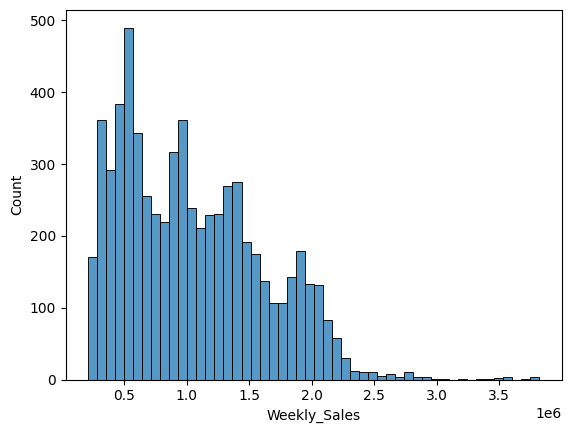

In [ ]:
# Visualizing the distribution of the Weekly Sales variable
sns.histplot(sales_df['Weekly_Sales'], bins=50)
plt.show()

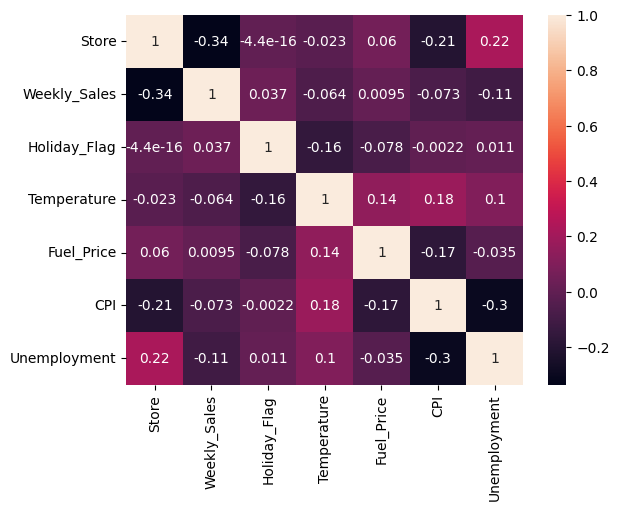

In [ ]:
# Visualizing the correlation between variables
sns.heatmap(sales_df.corr(), annot=True)
plt.show()

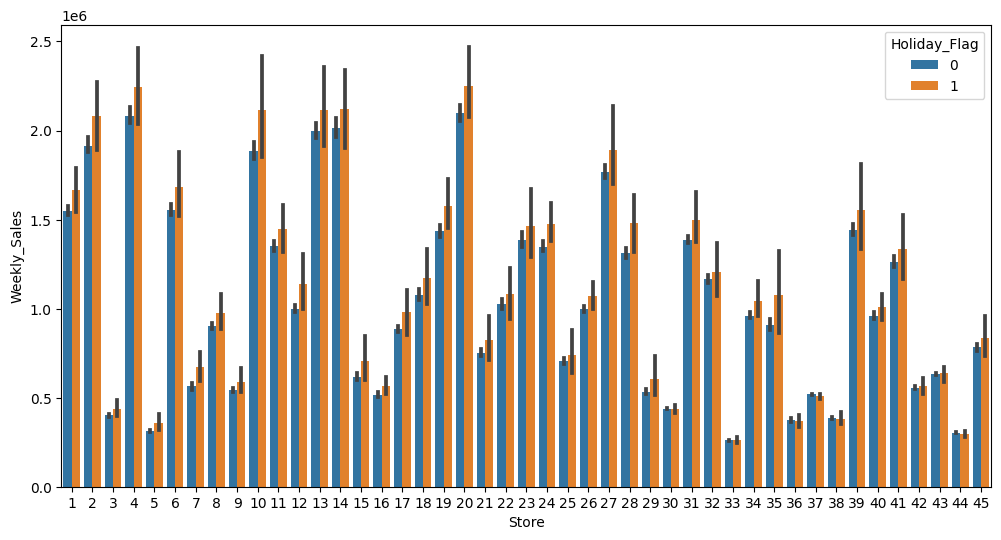

In [ ]:
# Visualizing the average Weekly Sales by store and holiday flag
plt.figure(figsize=(12, 6))  # Seting the figure size
sns.barplot(x='Store', y='Weekly_Sales', hue='Holiday_Flag', data=sales_df)
plt.show()

In [ ]:
sales_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


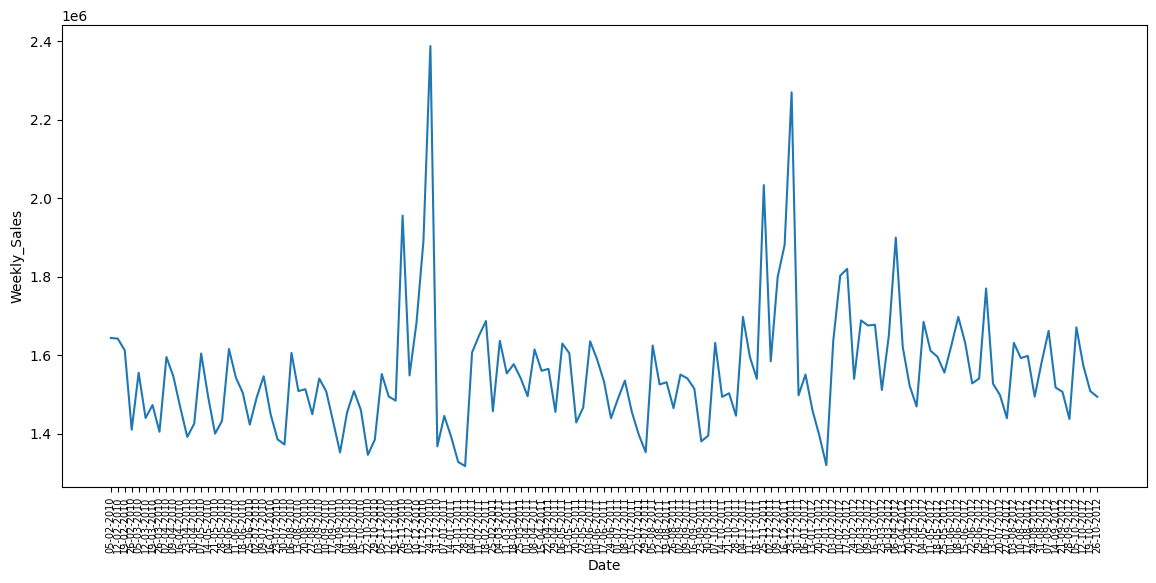

In [ ]:
# Visualizing the trend of Weekly Sales over time for a single store
plt.figure(figsize=(14, 6))
store1_df = sales_df[sales_df['Store'] == 1]
sns.lineplot(x='Date', y='Weekly_Sales', data=store1_df)
plt.xticks(rotation=90, fontsize = 7)  # Rotate the x-axis labels by 90 degrees
plt.show()

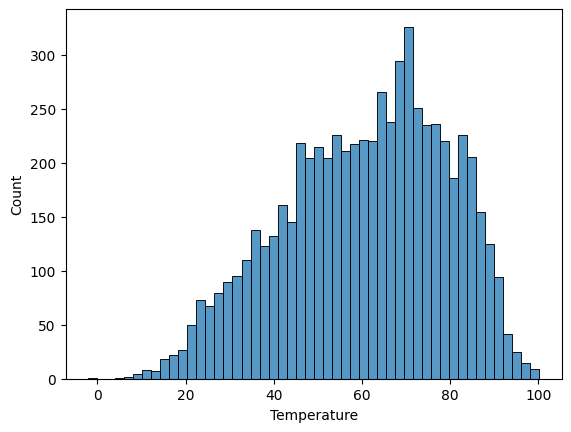

In [ ]:
# Visualizing the distribution of other variables
sns.histplot(sales_df['Temperature'], bins=50)
plt.show()

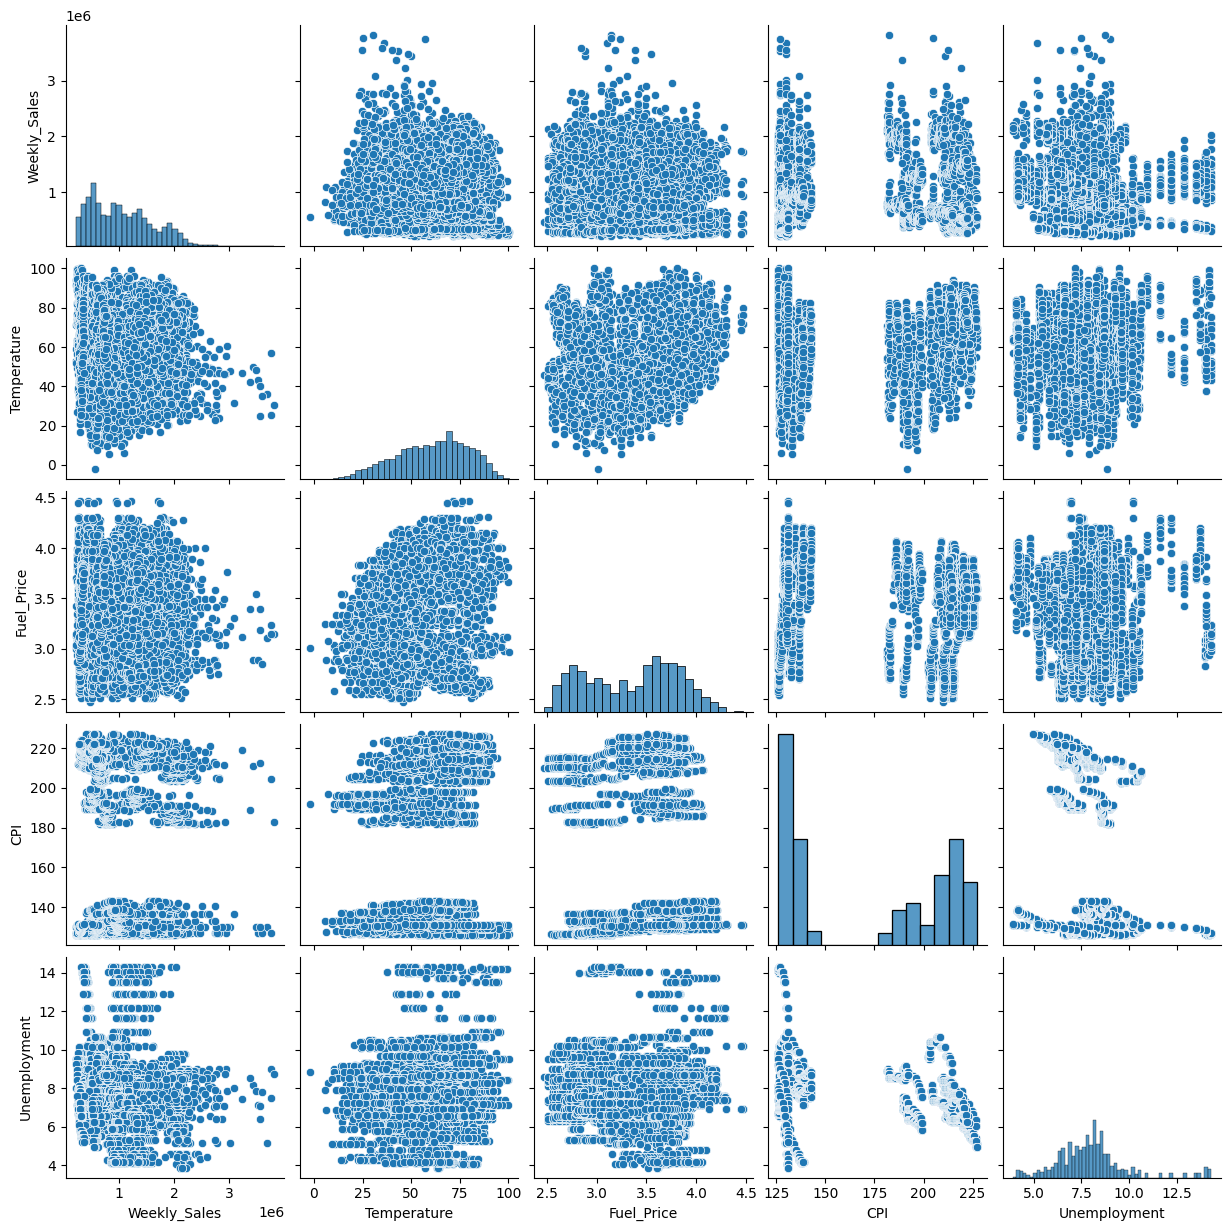

In [ ]:
# Explorng relationships between variables
sns.pairplot(sales_df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']])
plt.show()

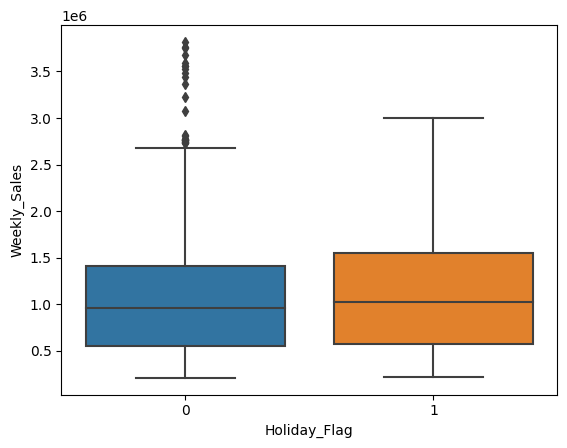

In [ ]:
# Checking for outliers or unusual observations in the data
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=sales_df)
plt.show()

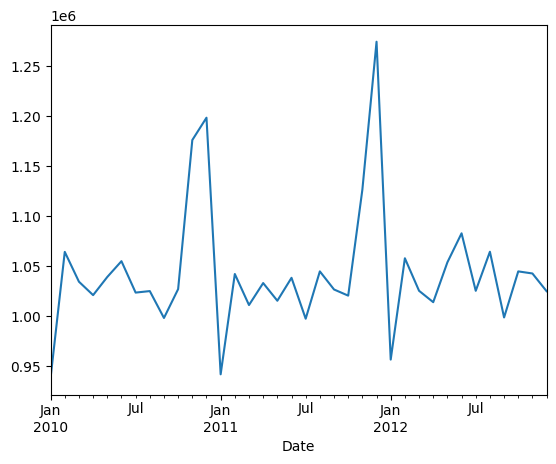

In [ ]:
# Checking for seasonality or trends in the data
sales_df['Date'] = pd.to_datetime(sales_df['Date'])
sales_df.set_index('Date', inplace=True)
sales_df.resample('M').mean()['Weekly_Sales'].plot()
plt.show()

**TIME-SERIES FORECASTING**

Time series forecasting is a statistical technique used to predict future values based on previously observed values in a time series dataset. This is an implementation of time series forecasting using SARIMAX model.

*   The first step is to split the data into training and test sets using iloc function. The training set contains all the data except the last 10 observations while the test set contains only the last 10 observations.

*   The next step is to select the endogenous variable (i.e., the variable to be forecasted) which is 'Weekly_Sales' in this case.


*   The SARIMAX model is then fitted to the training data. The order parameter specifies the order of the autoregressive, differencing, and moving average components while the seasonal_order parameter specifies the order of the seasonal components.


*   The forecast() method is then used to forecast the future sales for the next 10 weeks. Finally, the performance of the model is evaluated using root mean squared error (RMSE).








In [ ]:
# Split the data into training and test sets
train = sales_df.iloc[:-10]
test = sales_df.iloc[-10:]

In [ ]:
# Select the endogenous variable to forecast (i.e., 'Weekly_Sales')
endog_train = train['Weekly_Sales']
endog_test = test['Weekly_Sales']

In [ ]:
# Fit a SARIMAX model
model = SARIMAX(endog_train, order=(1, 1, 1), seasonal_order=(1, 1, 0, 52))
results = model.fit()

In [ ]:
# Forecast future sales for the next 10 weeks
forecast = results.forecast(steps=10)
print(forecast)

6425    816940.528088
6426    744270.441216
6427    745985.236395
6428    717328.350975
6429    711684.496344
6430    701996.894270
6431    756722.882270
6432    724622.962493
6433    768272.746772
6434    776655.551597
Name: predicted_mean, dtype: float64


In [ ]:
# Evaluate the performance of the model using RMSE
rmse = np.sqrt(mean_squared_error(endog_test, forecast))
print(f'RMSE: {rmse:.2f}')

RMSE: 37640.25


TIME SERIES ANALYSIS

In [ ]:
sales_df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-05-02,1,1643690.90,0,42.31,2.572,211.096358,8.106
2010-12-02,1,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106
2010-05-03,1,1554806.68,0,46.50,2.625,211.350143,8.106


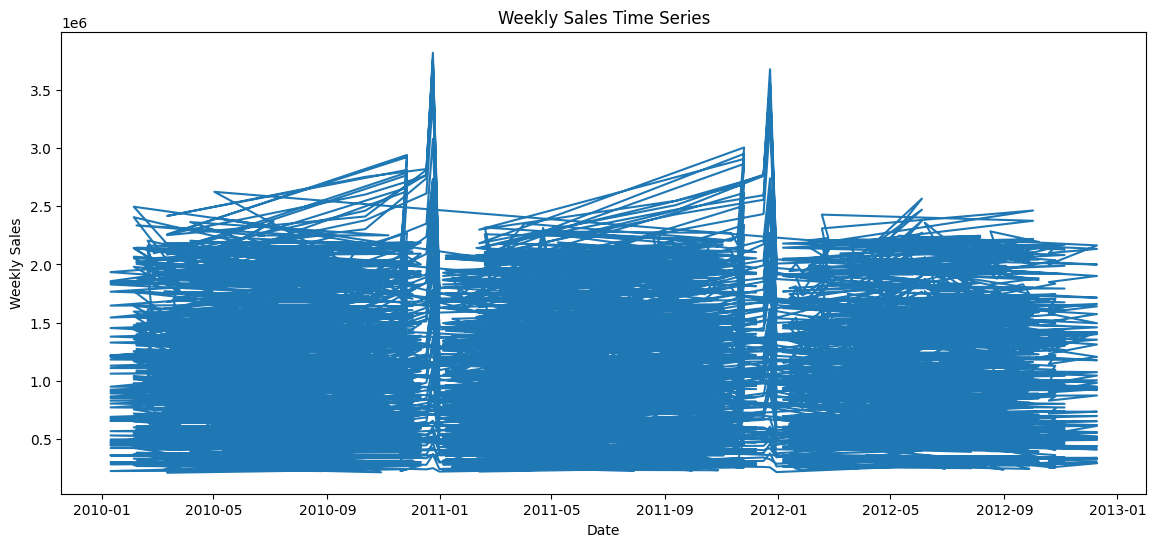

In [ ]:
# Plot the time series
plt.figure(figsize=(14, 6))
plt.plot(sales_df['Weekly_Sales'])
plt.title('Weekly Sales Time Series')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

In [ ]:
#sales_df.set_index('Date', inplace=True)

In [ ]:
# Resample the data to a weekly frequency
sales_df = sales_df.resample('W').sum()

In [ ]:
# Decompose the time series into trend, seasonal, and residual components
decomposition = seasonal_decompose(sales_df['Weekly_Sales'], model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

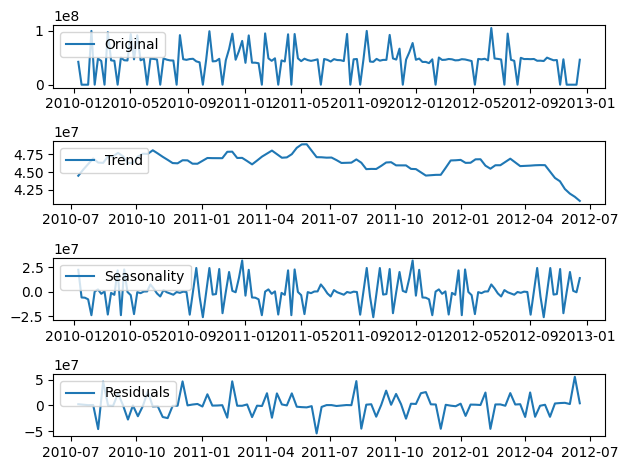

In [ ]:
# Plot the decomposed time series
plt.subplot(411)
plt.plot(sales_df['Weekly_Sales'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

This code is plotting the decomposed time series into its components: trend, seasonal, and residual.

The first plot (top plot) shows the original time series.

The second plot shows the trend component of the time series, which represents the long-term behavior of the time series.

The third plot shows the seasonal component, which represents the cyclical pattern that repeats at fixed intervals of time.

The fourth plot shows the residual component, which represents the random variation that cannot be explained by the trend or the seasonal components.




In [ ]:
# Check for stationarity using the Augmented Dickey-Fuller test
result = adfuller(sales_df['Weekly_Sales'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -13.698000
p-value: 0.000000
Critical Values:
	1%: -3.474
	5%: -2.881
	10%: -2.577


**Augmented Dickey-Fuller test**

The Augmented Dickey-Fuller (ADF) test is a statistical test used to determine whether a time series is stationary or not. Stationarity is an important concept in time series analysis, which implies that the statistical properties of the series remain constant over time, such as the mean, variance, and autocorrelation.

The ADF test outputs a test statistic, a p-value, and critical values for different levels of confidence. The null hypothesis of the test is that the time series is non-stationary. Therefore, if the p-value is less than the significance level (usually 0.05), then we reject the null hypothesis and conclude that the time series is stationary.

ARIMA model

In [ ]:
# Model the time series using an ARIMA model
model = ARIMA(sales_df['Weekly_Sales'], order=(2,1,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  154
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2827.106
Date:                Fri, 15 Dec 2023   AIC                           5664.212
Time:                        13:29:26   BIC                           5679.364
Sample:                    01-10-2010   HQIC                          5670.367
                         - 12-16-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0569      0.180     -5.858      0.000      -1.411      -0.703
ar.L2         -0.1781      0.094     -1.899      0.058      -0.362       0.006
ma.L1         -0.0191      0.170     -0.112      0.9

In [ ]:
# Make predictions on new data
forecast = model_fit.predict(start=len(sales_df), end=len(sales_df)+12, typ='levels')
print(forecast)

2012-12-23    2.946376e+07
2012-12-30    3.256272e+07
2013-01-06    3.225576e+07
2013-01-13    3.202819e+07
2013-01-20    3.232340e+07
2013-01-27    3.205191e+07
2013-02-03    3.228627e+07
2013-02-10    3.208693e+07
2013-02-17    3.225588e+07
2013-02-24    3.211282e+07
2013-03-03    3.223393e+07
2013-03-10    3.213140e+07
2013-03-17    3.221820e+07
Freq: W-SUN, Name: predicted_mean, dtype: float64


REGRESSION MODEL


A linear regression model is trained using the training data, and the model is used to make predictions on the test set. The root mean squared error (RMSE) is calculated as a measure of the model's performance.

In [ ]:
sales_df = pd.read_csv('/content/drive/MyDrive/All_Dataset_Folder/Walmart Data Analysis and Forcasting (1).csv')
sales_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
sales_df.shape

(6435, 8)

In [ ]:
# Example 3: Using reset_index, inplace=True
sales_df.reset_index(inplace=True)

In [ ]:
# Convert the 'Date' column to a datetime object
sales_df['Date'] = pd.to_datetime(sales_df['Date'])

In [ ]:
# Extract the year and month as new features
sales_df['Year'] = sales_df['Date'].dt.year
sales_df['Month'] = sales_df['Date'].dt.month

In [ ]:
# Define the features to use for prediction
features = ['Year', 'Month', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(sales_df[features], sales_df['Weekly_Sales'], test_size=0.2, random_state=42)

In [ ]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([1141034.15446432, 1107059.63566047, 1037617.85528815, ...,
       1020399.50998679,  944968.32680191, 1159898.87913604])

In [ ]:
# Evaluate the model using the root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

RMSE: 559915.6102482212


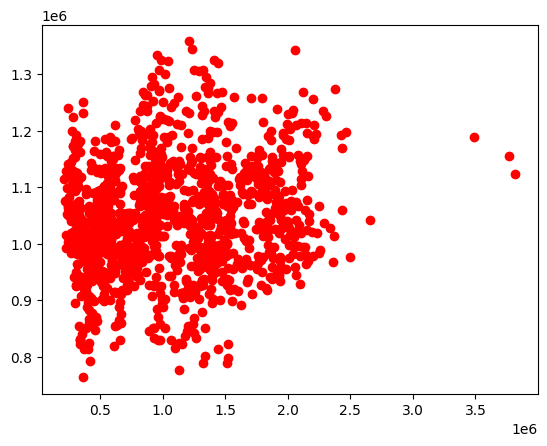

In [ ]:
# Plot the scatter plot of actual vs predicted weekly sales
plt.scatter(y_test, y_pred, color = 'red')

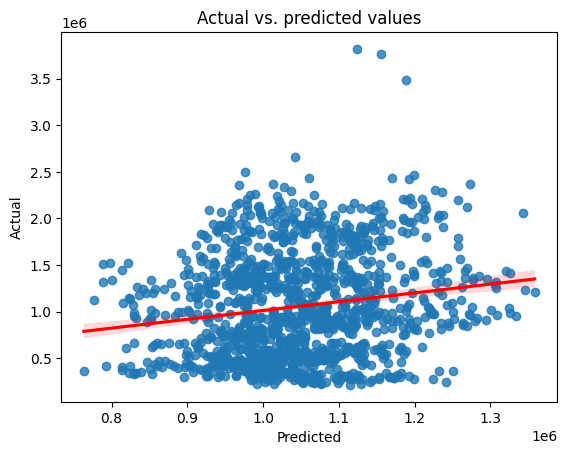

In [ ]:
# Check the linearity assumption
sns.regplot(x=y_pred, y=y_test, line_kws={'color': 'red'})
plt.title('Actual vs. predicted values')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

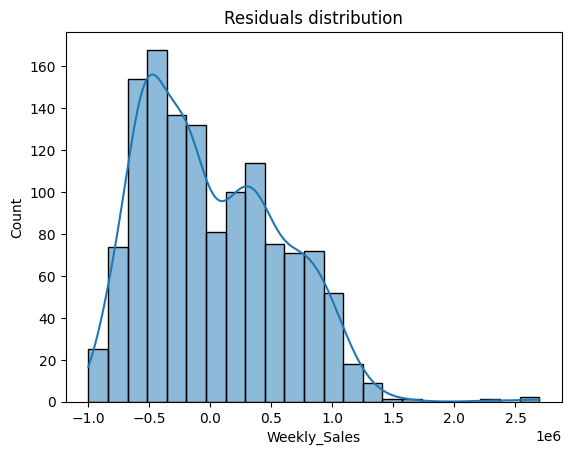

In [ ]:
# Check the normality of residuals assumption
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title('Residuals distribution')
plt.show()

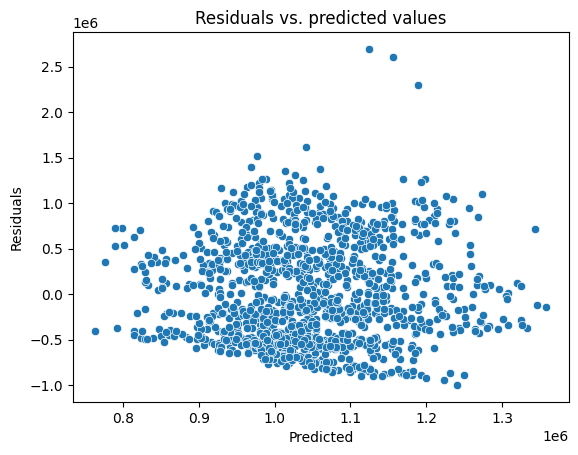

In [ ]:
# Check the homoscedasticity assumption
sns.scatterplot(x=y_pred, y=residuals)
plt.title('Residuals vs. predicted values')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.show()

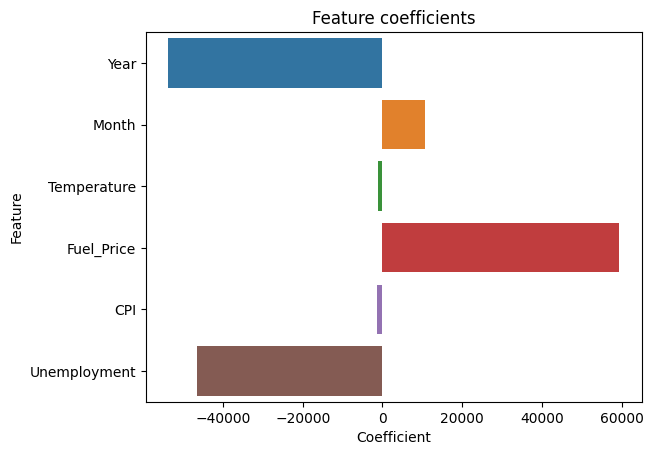

In [ ]:
# Plot the coefficients
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Feature coefficients')
plt.show()